PHÂN TÍCH DỮ LIỆU US BABY NAME 1880-2010


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Chuẩn bị dữ liệu

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

# ====== CẤU HÌNH ======
csv_path = "/content/drive/MyDrive/PTDL/lap 2 làm lại/babynames.csv"
SAVE_DIR = "/content/baby_figs"
os.makedirs(SAVE_DIR, exist_ok=True)

# ====== ĐỌC DỮ LIỆU ======
names = pd.read_csv(csv_path)
names.head()

# Đảm bảo các cột đúng định dạng
names.columns = [c.strip().lower() for c in names.columns]
names = names[["name", "sex", "births", "year"]]

# ====== TÍNH PROP (tỷ lệ trong năm) ======
def add_prop(group):
    total = group["births"].sum()
    group["prop"] = group["births"] / total
    return group

names = names.groupby(["year", "sex"], group_keys=False).apply(add_prop)

# ====== LẤY TOP 1000 ======
def get_top1000(group):
    return group.sort_values("births", ascending=False).head(1000)

top1000 = names.groupby(["year", "sex"], group_keys=False).apply(get_top1000).reset_index(drop=True)

print("✅ Đã nạp dữ liệu CSV thành công.")
print("Kích thước:", names.shape)
print("Top 1000 bản ghi mỗi năm đã sẵn sàng.")


/tmp/ipython-input-2998001357.py:25: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  names = names.groupby(["year", "sex"], group_keys=False).apply(add_prop)


✅ Đã nạp dữ liệu CSV thành công.
Kích thước: (1692632, 5)
Top 1000 bản ghi mỗi năm đã sẵn sàng.


/tmp/ipython-input-2998001357.py:31: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top1000 = names.groupby(["year", "sex"], group_keys=False).apply(get_top1000).reset_index(drop=True)


1 — Số lượng trẻ sinh theo giới (1880–2010)


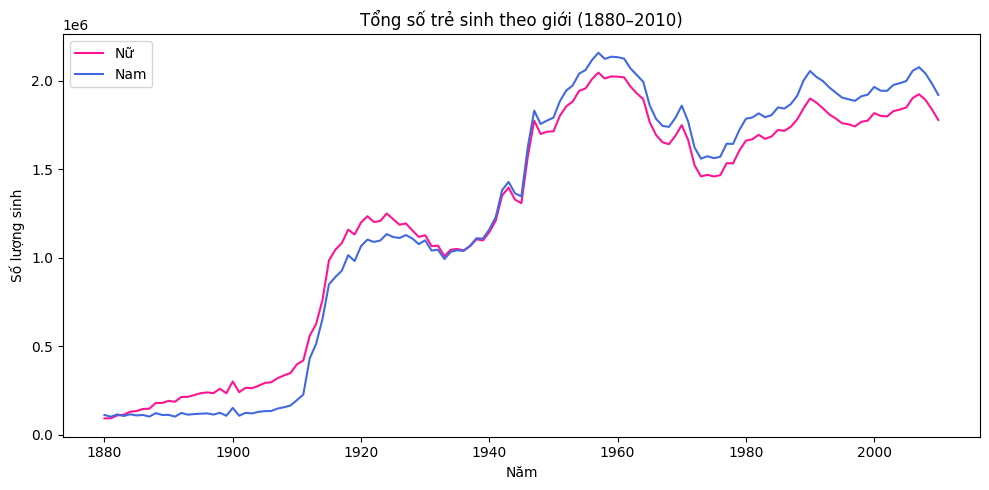

In [ ]:
total_births = names.pivot_table("births", index="year", columns="sex", aggfunc="sum")
plt.figure(figsize=(10,5))
plt.plot(total_births.index, total_births["F"], label="Nữ", color="deeppink")
plt.plot(total_births.index, total_births["M"], label="Nam", color="royalblue")
plt.title("Tổng số trẻ sinh theo giới (1880–2010)")
plt.xlabel("Năm"); plt.ylabel("Số lượng sinh"); plt.legend()
plt.tight_layout(); plt.savefig(f"{SAVE_DIR}/1_total_births.png", dpi=150)
plt.show()



Nhận xét:
Số sinh tăng mạnh tới giữa thế kỷ 20, giảm nhẹ sau 2000.
Luôn có nhiều bé trai hơn bé gái (~51–52%).

2 — Top 10 tên phổ biến theo từng thập kỷ

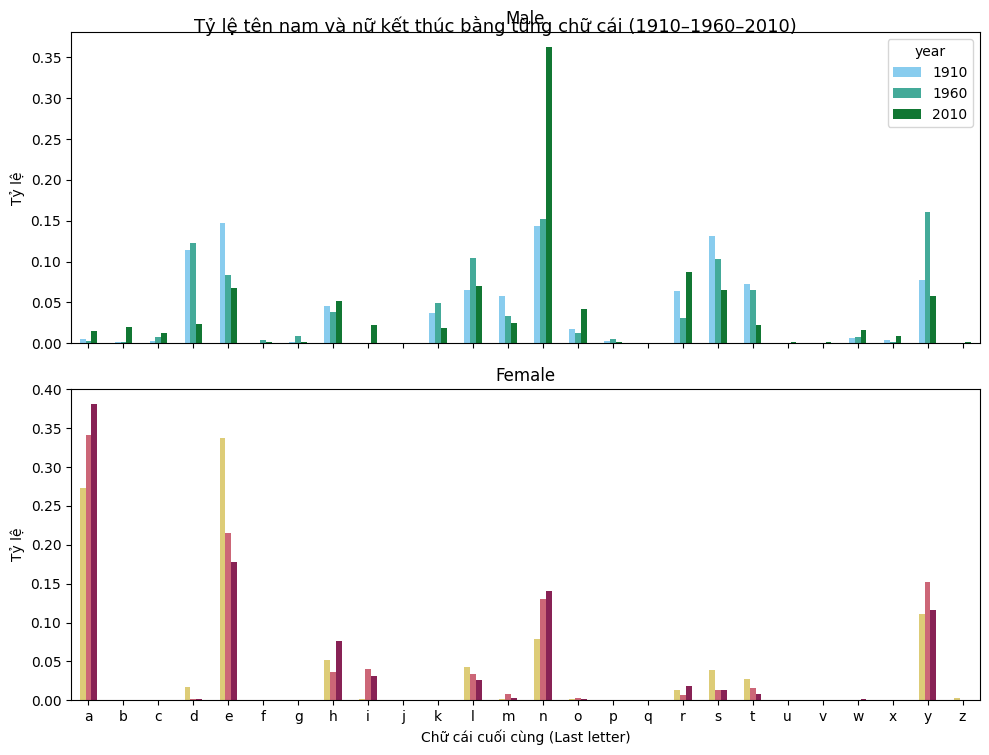

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# ----------------------------------------
# TẠO CỘT CHỮ CÁI CUỐI CÙNG CỦA TÊN
# ----------------------------------------
names["last_letter"] = names["name"].str[-1]

# Tổng số sinh theo chữ cái cuối, giới và năm
table = names.pivot_table(
    "births",
    index="last_letter",
    columns=["sex", "year"],
    aggfunc="sum"
)

# Chọn 3 năm đại diện
subtable = table.reindex(columns=[1910, 1960, 2010], level="year")

# Chuẩn hóa theo tổng số sinh của từng năm/giới
letter_prop = subtable / subtable.sum()

# ----------------------------------------
# VẼ SUBPLOT 2 HÀNG — MALE & FEMALE
# ----------------------------------------
fig, axes = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

letter_prop["M"].plot(
    kind="bar",
    rot=0,
    ax=axes[0],
    title="Male",
    color=["#88ccee", "#44aa99", "#117733"]
)

letter_prop["F"].plot(
    kind="bar",
    rot=0,
    ax=axes[1],
    title="Female",
    color=["#ddcc77", "#cc6677", "#882255"],
    legend=False
)

axes[0].set_ylabel("Tỷ lệ")
axes[1].set_ylabel("Tỷ lệ")
axes[1].set_xlabel("Chữ cái cuối cùng (Last letter)")

plt.suptitle("Tỷ lệ tên nam và nữ kết thúc bằng từng chữ cái (1910–1960–2010)", fontsize=13, y=0.93)
plt.tight_layout()
plt.savefig(f"{SAVE_DIR}/last_letter_distribution.png", dpi=150)
plt.show()




Nhận xét:
Tên nữ thay đổi rõ qua từng giai đoạn: Mary → Linda → Jennifer → Emma.
→ Phản ánh xu hướng văn hóa, phim ảnh, và thời trang từng thập kỷ.

3 — Tỷ lệ tập trung tên (Top 1000 chiếm bao nhiêu % tổng sinh)

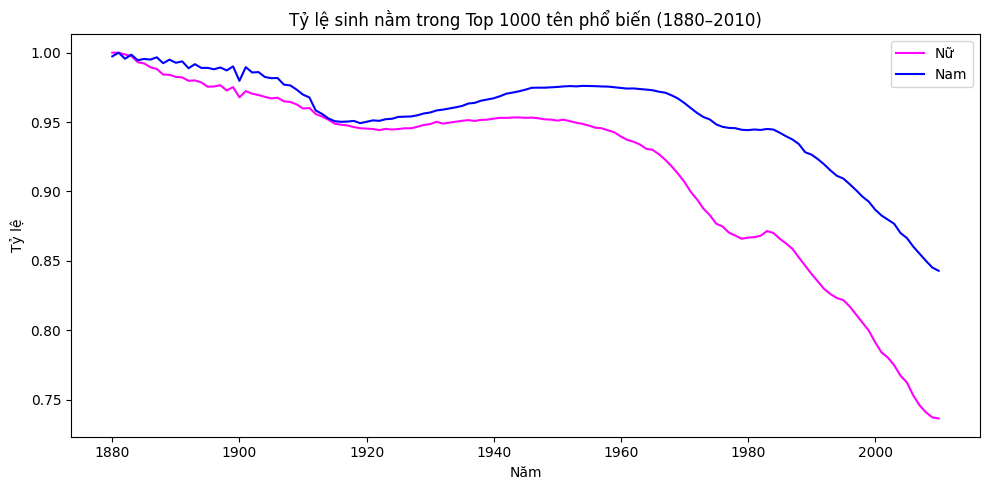

In [ ]:
top_share = top1000.pivot_table("prop", index="year", columns="sex", aggfunc="sum")
plt.figure(figsize=(10,5))
plt.plot(top_share.index, top_share["F"], label="Nữ", color="magenta")
plt.plot(top_share.index, top_share["M"], label="Nam", color="blue")
plt.title("Tỷ lệ sinh nằm trong Top 1000 tên phổ biến (1880–2010)")
plt.xlabel("Năm"); plt.ylabel("Tỷ lệ"); plt.legend()
plt.tight_layout(); plt.savefig(f"{SAVE_DIR}/3_concentration.png", dpi=150)
plt.show()




Nhận xét:
Tỷ lệ này giảm dần: từ ~80% (1880) xuống ~45% (2010).
→ Cha mẹ Mỹ ngày càng thích chọn tên hiếm, cá tính.

4 — Độ đa dạng hóa tên (số tên chiếm 50% dân số)

/tmp/ipython-input-3641601318.py:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda g: quantile_count(g, 0.5))


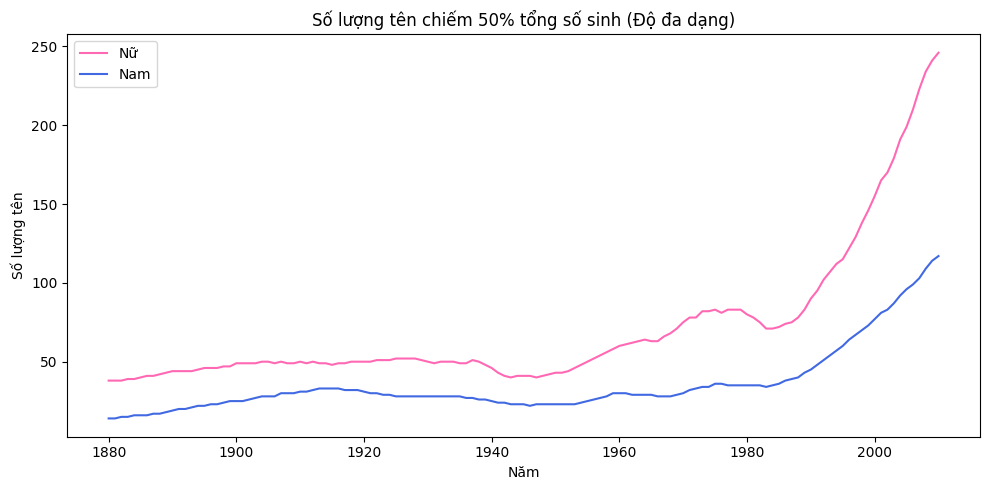

In [ ]:
def quantile_count(group, q=0.5):
    props = group["prop"].sort_values(ascending=False).cumsum()
    return props.searchsorted(q) + 1

diversity = (
    top1000.groupby(["year", "sex"], group_keys=False)
    .apply(lambda g: quantile_count(g, 0.5))
    .reset_index(name="count")
    .pivot(index="year", columns="sex", values="count")
)

plt.figure(figsize=(10,5))
plt.plot(diversity.index, diversity["F"], label="Nữ", color="hotpink")
plt.plot(diversity.index, diversity["M"], label="Nam", color="royalblue")
plt.title("Số lượng tên chiếm 50% tổng số sinh (Độ đa dạng)")
plt.xlabel("Năm"); plt.ylabel("Số lượng tên"); plt.legend()
plt.tight_layout(); plt.savefig(f"{SAVE_DIR}/4_diversity.png", dpi=150)
plt.show()



Nhận xét:
Bé gái có nhiều tên hơn để đạt 50% dân số.

Độ đa dạng tăng liên tục sau năm 1970 → xã hội cởi mở hơn.

# 5 — Phân tích tên trung tính (Unisex)

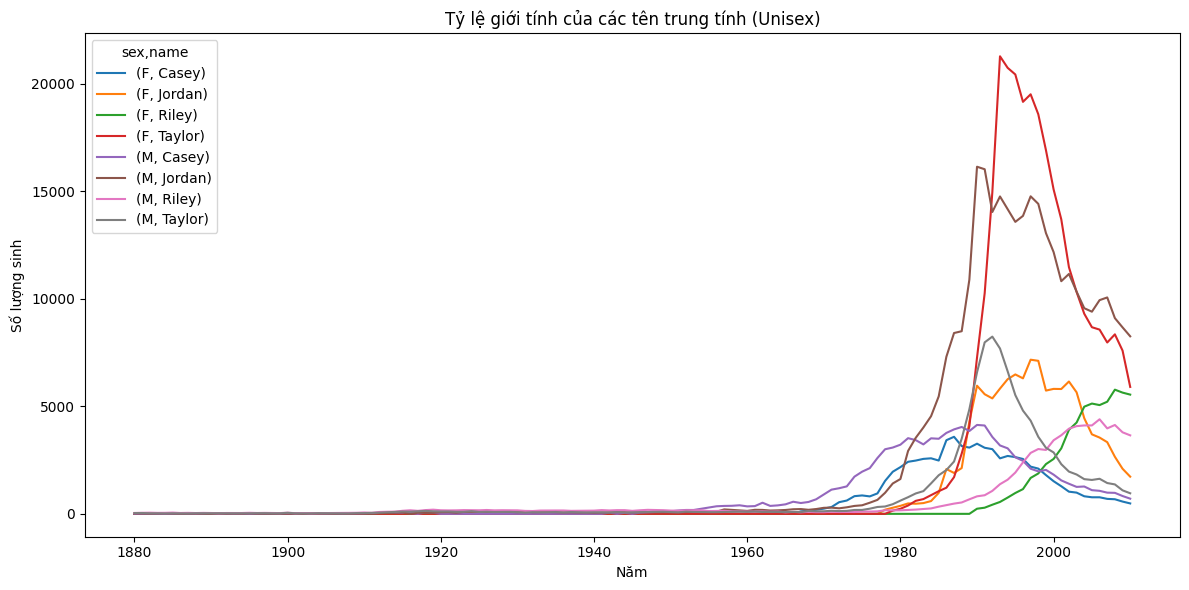

In [ ]:
unisex_names = ["Jordan", "Taylor", "Riley", "Casey"]
subset = top1000[top1000["name"].isin(unisex_names)]
pivot_unisex = subset.pivot_table("births", index="year", columns=["sex","name"], aggfunc="sum").fillna(0)

plt.figure(figsize=(12,6))
pivot_unisex.plot(ax=plt.gca())
plt.title("Tỷ lệ giới tính của các tên trung tính (Unisex)")
plt.xlabel("Năm"); plt.ylabel("Số lượng sinh")
plt.tight_layout(); plt.savefig(f"{SAVE_DIR}/5_unisex.png", dpi=150)
plt.show()

Nhận xét:
Tên trung tính như Taylor, Jordan phổ biến mạnh từ thập niên 1980 trở đi.
→ Gắn liền với phong trào bình đẳng giới và văn hóa đại chúng Mỹ.

6 — So sánh độ tập trung giữa nam và nữ

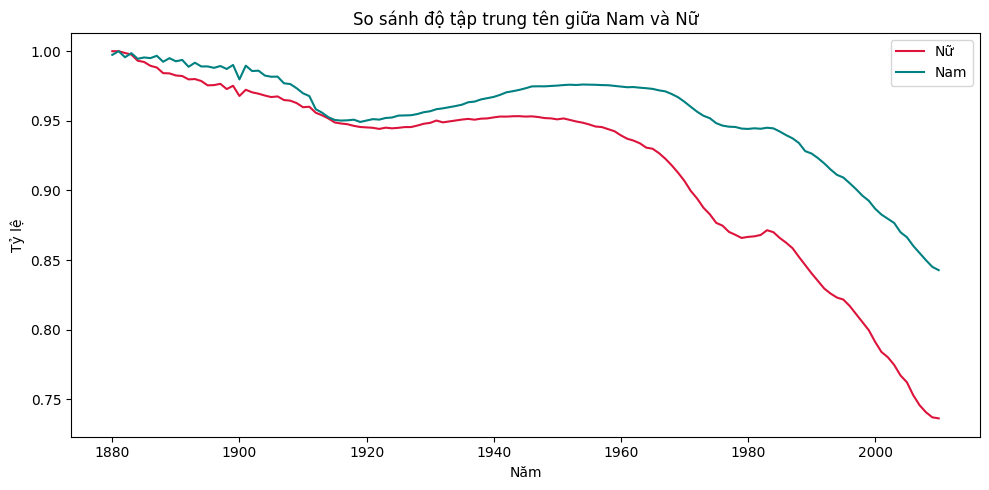

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(top_share.index, top_share["F"], label="Nữ", color="crimson")
plt.plot(top_share.index, top_share["M"], label="Nam", color="teal")
plt.title("So sánh độ tập trung tên giữa Nam và Nữ")
plt.xlabel("Năm"); plt.ylabel("Tỷ lệ")
plt.legend(); plt.tight_layout()
plt.savefig(f"{SAVE_DIR}/6_compare.png", dpi=150)
plt.show()


Nhận xét: Tên bé trai thường ổn định hơn, ít biến động.
Tên bé gái thay đổi mạnh → dẫn đầu xu hướng sáng tạo.

7 — Tên ngắn hạn (short-lived) vs lâu dài (long-lived)

In [ ]:
life = (
    top1000.groupby(["name", "sex"])
    .agg(years=("year","nunique"), total=("births","sum"))
    .reset_index()
)
short = life[life["years"] <= 10].sort_values("total", ascending=False)
long  = life[life["years"] >= 40].sort_values("years", ascending=False)

print("🎯 Top 10 tên ngắn hạn (≤10 năm):")
print(short.head(10))
print("\n🌿 Top 10 tên lâu dài (≥40 năm):")
print(long.head(10))


🎯 Top 10 tên ngắn hạn (≤10 năm):
          name sex  years  total
5472    Nevaeh   F     10  44390
1049   Cadence   F      9  11834
4793    Maddox   M      8  11508
4093     Khloe   F      5  11307
1052    Caiden   M     10   8677
7426    Ximena   F     10   7886
3003    Harper   F      7   7628
3973  Kaydence   F      8   7608
2699      Gael   M      9   7548
49     Addyson   F      7   7385

🌿 Top 10 tên lâu dài (≥40 năm):
           name sex  years   total
25      Abraham   M    131   72909
37         Adam   M    131  513225
4         Aaron   M    131  524096
2671  Frederick   M    131  257102
2695    Gabriel   M    131  261547
2724    Garrett   M    131  119353
2761  Genevieve   F    131   99800
7269   Virginia   F    131  644547
7276     Vivian   F    131  185545
7289       Wade   M    131   64564


Nhận xét: Tên ngắn hạn thường do xu hướng giải trí hoặc nhân vật nổi tiếng.
Tên lâu dài thường mang ý nghĩa truyền thống (Mary, William, Elizabeth).

8 — Dự đoán & Chu kỳ “Tên cổ điển”

📈 Tên tăng nhanh nhất (20 năm gần đây):
           name sex        ratio
3807    Justin   M  1547.444444
3609   Jessica   F  1312.764045
3699  Jonathan   M  1026.183801
6319  Samantha   F  1023.639640
21     Abigail   F   854.883212
3708    Jordan   M   832.353147
3173    Hunter   M   818.898477
3737    Joshua   M   709.376330
4211      Kyle   M   695.721408
1061     Caleb   M   661.981884

📉 Tên giảm mạnh nhất:
           name sex     ratio
6479    Sharon   F  0.103687
4631      Lori   F  0.109778
7411   Woodrow   M  0.111467
3954     Kathy   F  0.112098
4770     Mabel   F  0.115969
5803     Pearl   F  0.118336
5084     Maude   F  0.118596
2617  Florence   F  0.127192
774     Bertha   F  0.127728
5453    Nellie   F  0.133318


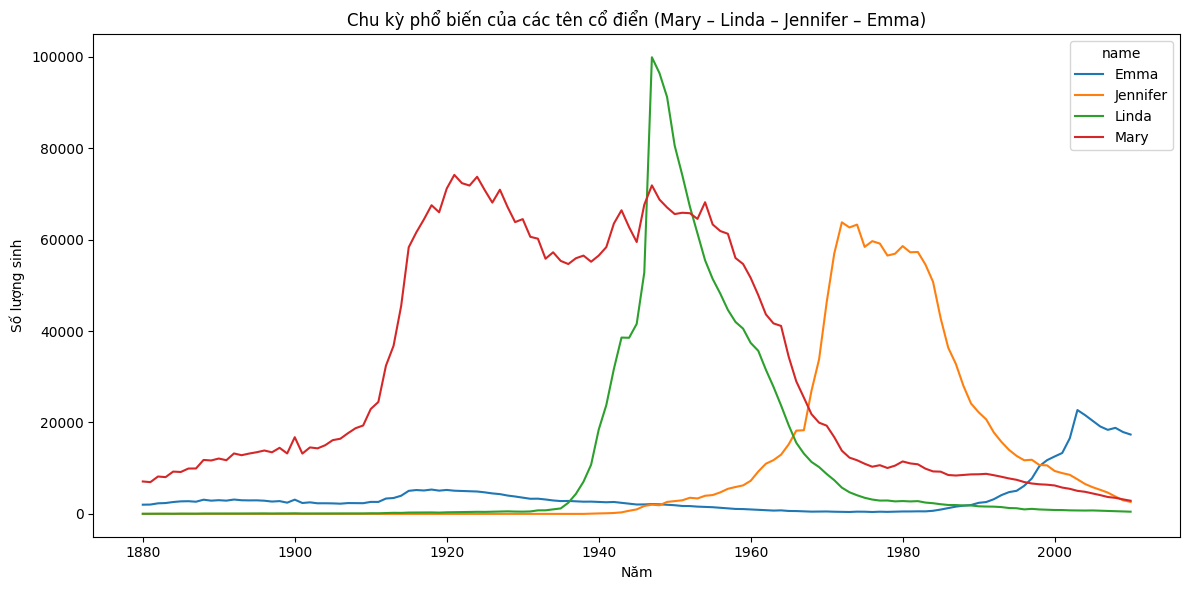

In [ ]:
def trend_ratio(x, tail=20, head=20):
    if len(x) < tail + head: return np.nan
    return x.tail(tail).mean() / x.head(head).mean()

trend = (
    top1000.groupby(["name","sex"])["births"]
    .apply(lambda x: trend_ratio(x))
    .reset_index(name="ratio").dropna()
)

up = trend.sort_values("ratio", ascending=False).head(10)
down = trend.sort_values("ratio", ascending=True).head(10)

print("📈 Tên tăng nhanh nhất (20 năm gần đây):\n", up)
print("\n📉 Tên giảm mạnh nhất:\n", down)

classic = ["Mary", "Linda", "Jennifer", "Emma"]
cycle = top1000[top1000["name"].isin(classic)]
pivot_cycle = cycle.pivot_table("births", "year", "name", aggfunc="sum").fillna(0)
pivot_cycle.plot(figsize=(12,6))
plt.title("Chu kỳ phổ biến của các tên cổ điển (Mary – Linda – Jennifer – Emma)")
plt.xlabel("Năm"); plt.ylabel("Số lượng sinh")
plt.tight_layout(); plt.savefig(f"{SAVE_DIR}/8_vintage_cycle.png", dpi=150)
plt.show()



Nhận xét:
Tên Emma quay lại top đầu sau năm 2000 — tương tự Mary của đầu thế kỷ XX.
→ Tồn tại “chu kỳ cổ điển” ~60–80 năm.
Tên cổ thường hồi sinh khi trở nên “hoài niệm – retro”.

Kết luận: Tổng số trẻ sinh tăng mạnh đến giữa thế kỷ 20 và giảm nhẹ sau năm 2000. Số trẻ nam luôn nhiều hơn nữ. Các tên ngày càng trở nên đa dạng, đặc biệt là ở giới nữ. Những tên trung tính như Jordan, Taylor hay Riley ngày càng phổ biến hơn. Nhiều tên “cổ điển” có xu hướng quay trở lại sau khoảng 60–80 năm, và có thể dự đoán được những tên sắp biến mất hoặc hồi sinh dựa trên xu hướng này.